## Classificação Binária vs Multi-classe

Os exemplos de Regressão Logística mostraram como realizar a classificação para datasets com duas classes:

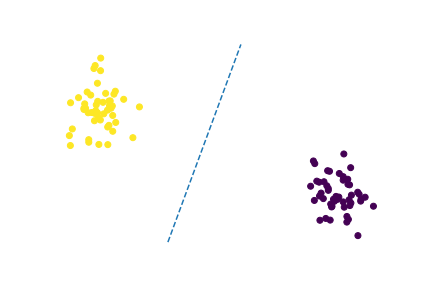

E o que fazemos quando o dataset tem mais de duas classes?

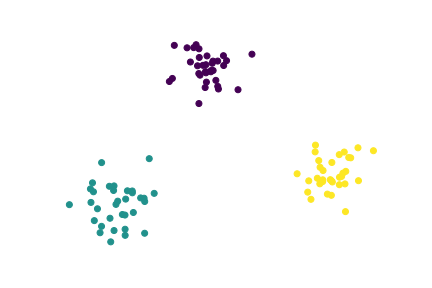

### One vs Rest (OVR), também conhecido como One vs All (OVA)

- Treinamos um classificador por classe, em que as observações da classe em questão são consideradas como sendo "positivas" (classe 1), e as demais como sendo "negativas" (classe 0)
- Para uma nova observação, o classificador resultante atribui classe com maior probabilidade dentre todos os classificadores
- Requer treinar n classificadores, n sendo o número de classes (poucos)
- Cada classificador usa todos os dados para o treinamento

### One vs One (OVO)

- Treinamos um classificador por par de classes classe, em que as observações da classe em questão são consideradas como sendo da classe "1", e as demais como sendo da classe "0"
- Para uma nova observação, o classificador resultante atribui classe com maior probabilidade dentre todos os classificadores
- Requer treinar n*(n-1)/2 classificadores, n sendo o número de classes (muitos)
- Cada classificador utiliza somente os dados das duas classes em questão (bom para classificadores que não escalam bem com grande número de observações)

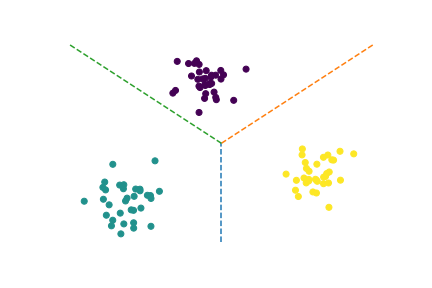

### Exemplo utilizando os meta-classifiers do scikit-learn

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 15]

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

#define função para criar plots com fronteiras de decisão
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, s=5)
    plt.axis('off')


#### Criação de dados de exemplo utilizando make_blobs (2 dimensões)

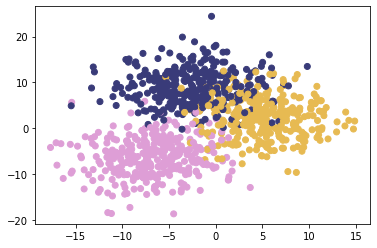

In [5]:
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=4, centers=3, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab20b)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Treinamento do classificador One vs Rest com Regressão Logística

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
%time ovr.fit(X_train, y_train)
print(ovr.score(X_test, y_test))

CPU times: user 24.5 ms, sys: 4.1 ms, total: 28.6 ms
Wall time: 17.2 ms
0.89


#### Treinamento do classificador One vs One com Regressão Logística

In [7]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

ovo = OneVsOneClassifier(LogisticRegression(solver='lbfgs'))
%time ovo.fit(X_train, y_train)
print(ovo.score(X_test, y_test))

CPU times: user 40 ms, sys: 344 µs, total: 40.3 ms
Wall time: 21.5 ms
0.88


#### Fronteiras de decisão OVR:

CPU times: user 609 ms, sys: 50.7 ms, total: 660 ms
Wall time: 397 ms


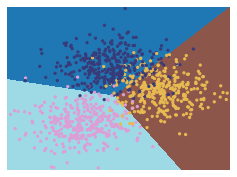

In [10]:
%time plot_decision_boundary(ovr, X, y)

#### Fronteiras de decisão OVO:

CPU times: user 1.58 s, sys: 698 ms, total: 2.28 s
Wall time: 1.22 s


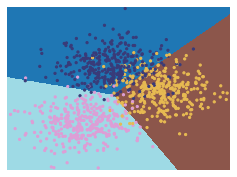

In [11]:
%time plot_decision_boundary(ovo, X, y)

**Pergunta esperada neste momento**: sempre que eu quiser classificar um dataset com mais de duas classes precisarei usar esses meta-classifiers?
**Resposta: Não**, o scikit-learn faz isso por nós. Veja:

CPU times: user 27.3 ms, sys: 0 ns, total: 27.3 ms
Wall time: 25.6 ms
0.88


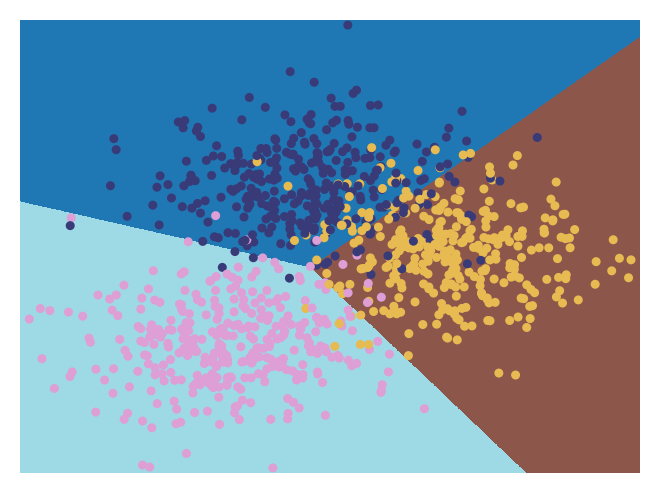

In [10]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
%time lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
plot_decision_boundary(lr, X, y)

### Explorações

Os meta-classifiers recebem um objeto com um classificador concreto para treinar dependendo da estratégia (OVR, OVO). Por exemplo, no nosso código, LogisticRegression é o classificador utilizado:

```ovr = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))```

Você pode experimentar utilizar outros classificadores para ver o que acontece. Alguns exemplos de classificadores (não se preocupe com os detalhes por enquanto)

- sklearn.neighbors.KNeighborsClassifier
- tree.DecisionTreeClassifier

Mais classificadores na [documentação](https://scikit-learn.org/stable/modules/classes.html) do scikit-learn

Por exemplo:

CPU times: user 6.22 ms, sys: 0 ns, total: 6.22 ms
Wall time: 6.23 ms
0.815


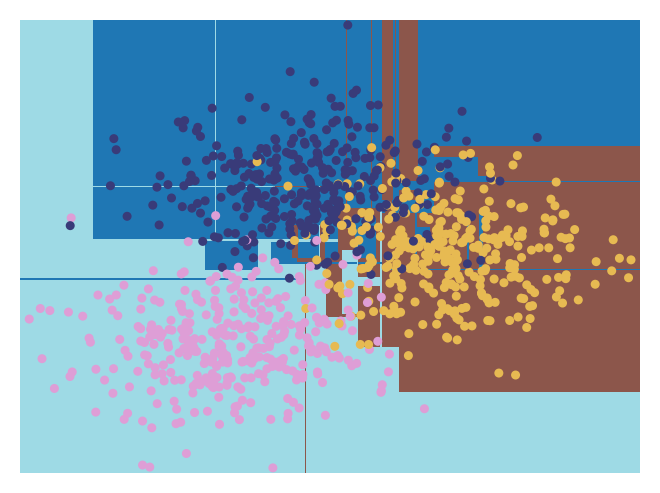

In [11]:
from sklearn.tree import DecisionTreeClassifier
ovo_dt = OneVsOneClassifier(DecisionTreeClassifier())
%time ovo_dt.fit(X_train, y_train)
print(ovo_dt.score(X_test, y_test))
plot_decision_boundary(ovo_dt, X, y)

Por que essa fronteira de decisão é tão diferente das demais?